In [461]:
import pandas as pd
import matplotlib.pyplot as plt

In [462]:
data = pd.read_csv('notes.csv')
data

,note
0,"Wake up early, perform Fajr prayer"
1,"Shower with cold water, refreshing in the morning"
2,Breakfast with toast and milk
3,"Jogging around the boarding house, meet many c..."
4,"Leave for campus, travel from the campus"
...,...
846,Dinner with fried rice
847,Watching TV news
848,Brief gaming session for entertainment
849,Squeezing in a bit of study time


In [463]:
data.isnull().sum()

note    0
dtype: int64

In [464]:
data.shape

(851, 1)

In [465]:
data.duplicated().sum()

80

In [466]:
data.drop_duplicates()

,note
0,"Wake up early, perform Fajr prayer"
1,"Shower with cold water, refreshing in the morning"
2,Breakfast with toast and milk
3,"Jogging around the boarding house, meet many c..."
4,"Leave for campus, travel from the campus"
...,...
846,Dinner with fried rice
847,Watching TV news
848,Brief gaming session for entertainment
849,Squeezing in a bit of study time


In [467]:
import re

def clean_notes(data):
    # Remove @ sign
    data = re.sub(r"@[A-Za-z0-9_]+", "", data)
    # Remove http links
    data = re.sub(r"http\S+|www\S+|https\S+", "", data, flags=re.MULTILINE)
    # Remove extra spaces
    data = " ".join(data.split())
    # Define emoji pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove Emojis
    data = emoji_pattern.sub(r'', data)
    # Remove hashtag sign but keep the text
    data = data.replace("#", "").replace("_", " ")
    # Remove numbers
    data = re.sub(r'\d+', '', data)
    # Remove punctuation
    data = re.sub(r'[^\w\s]', '', data)
    # Convert to lowercase
    data = data.lower()
    return data

In [468]:
# Apply the clean_notes function to the 'note' column
data['Note'] = data['note'].apply(clean_notes)
print(data)

                                                  note  \
0                   Wake up early, perform Fajr prayer   
1    Shower with cold water, refreshing in the morning   
2                        Breakfast with toast and milk   
3    Jogging around the boarding house, meet many c...   
4             Leave for campus, travel from the campus   
..                                                 ...   
846                             Dinner with fried rice   
847                                   Watching TV news   
848             Brief gaming session for entertainment   
849                   Squeezing in a bit of study time   
850                               Calling partner back   

                                                  Note  
0                    wake up early perform fajr prayer  
1     shower with cold water refreshing in the morning  
2                        breakfast with toast and milk  
3    jogging around the boarding house meet many ch...  
4              lea

In [469]:
data = data.drop(columns=['note'])
data

,Note
0,wake up early perform fajr prayer
1,shower with cold water refreshing in the morning
2,breakfast with toast and milk
3,jogging around the boarding house meet many ch...
4,leave for campus travel from the campus
...,...
846,dinner with fried rice
847,watching tv news
848,brief gaming session for entertainment
849,squeezing in a bit of study time


In [470]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(data, custom_stopwords=None):

    # Get English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Add custom stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)

    # Clean the text from stopwords
    cleaned_text = ' '.join([word for word in re.findall(r'\b\w+\b', data.lower()) if word not in stop_words])

    return cleaned_text

# custom stopwords list
custom_stopwords = set("""
a, about, above, after, again, against, all, am, an, and, any, are, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can't, cannot, could, couldn't, did, didn't, do, does, doesn't, doing, don't, down, during, each, few, for, from, further, had, hadn't, has, hasn't, have, haven't, having, he, he'd, he'll, he's, her, here, here's, hers, herself, him, himself, his, how, how's, i, i'd, i'll, i'm, i've, if, in, into, is, isn't, it, it's, its, itself, let's, me, more, most, mustn't, my, myself, no, nor, not, of, off, on, once, only, or, other, ought, our, ours, ourselves, out, over, own, same, shan't, she, she'd, she'll, she's, should, shouldn't, so, some, such, than, that, that's, the, their, theirs, them, themselves, then, there, there's, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, very, was, wasn't, we, we'd, we'll, we're, we've, were, weren't, what, what's, when, when's, where, where's, which, while, who, who's, whom, why, why's, with, won't, would, wouldn't, you, you'd, you'll, you're, you've, your, yours, yourself, yourselves
""".strip().split(', '))

# Apply the remove_stopwords function to the 'Note' column
data['filtered_text'] = data['Note'].apply(lambda x: remove_stopwords(x, custom_stopwords))

data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Note,filtered_text
0,wake up early perform fajr prayer,wake early perform fajr prayer
1,shower with cold water refreshing in the morning,shower cold water refreshing morning
2,breakfast with toast and milk,breakfast toast milk
3,jogging around the boarding house meet many ch...,jogging around boarding house meet many children
4,leave for campus travel from the campus,leave campus travel campus
...,...,...
846,dinner with fried rice,dinner fried rice
847,watching tv news,watching tv news
848,brief gaming session for entertainment,brief gaming session entertainment
849,squeezing in a bit of study time,squeezing bit study time


In [471]:
data_clean = data.drop(columns=['Note'])
data_clean

,filtered_text
0,wake early perform fajr prayer
1,shower cold water refreshing morning
2,breakfast toast milk
3,jogging around boarding house meet many children
4,leave campus travel campus
...,...
846,dinner fried rice
847,watching tv news
848,brief gaming session entertainment
849,squeezing bit study time


In [472]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# download the required data
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_dataframe(data_clean, filtered_text):

    # Initialize lemmatization
    lemmatizer = WordNetLemmatizer()

    # List to save the lemmatization result of each text
    lemmatized_texts = []

    # Lemmatize each text in the DataFrame
    for text in data_clean[filtered_text]:
        # Tokenization of text into words
        tokens = word_tokenize(text)

        # Lemmatize the words
        lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]

        # Merge the lemmatized words back into one text
        lemmatized_text = ' '.join(lemmatized_words)

        # Add the lemmatized text to the result list
        lemmatized_texts.append(lemmatized_text)

    # Create a new DataFrame with the lemmatized text
    df_lemmatized = pd.DataFrame({filtered_text: lemmatized_texts})

    return df_lemmatized

# Perform lemmatization on DataFrame
df_lemmatized = lemmatize_dataframe(data_clean, 'filtered_text')
df_lemmatized

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,filtered_text
0,wake early perform fajr prayer
1,shower cold water refreshing morning
2,breakfast toast milk
3,jogging around boarding house meet many child
4,leave campus travel campus
...,...
846,dinner fried rice
847,watching tv news
848,brief gaming session entertainment
849,squeezing bit study time


In [473]:
max_length = 0
longest_sentence = ""
sentence_index = -1

for index, sentence in enumerate(df_lemmatized['filtered_text']):
    length = len(sentence.split())
    if length > max_length:
        max_length = length
        longest_sentence = sentence
        sentence_index = index

print("Longest sentence:")
print(longest_sentence)
print("Length:", max_length)
print("Found in line:", sentence_index)

Longest sentence:
nap due medicine effect vivid dream head start clear cough cold
Length: 11
Found in line: 44


In [474]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Feature Extraction with Word Embeddings (Word2Vec)
word_embeddings_model = Word2Vec(sentences=[word_tokenize(text) for text in df_lemmatized['filtered_text']], vector_size=100, window=5, min_count=1, sg=1)
word_embeddings = []
for text in df_lemmatized['filtered_text']:
    text_embedding = [word_embeddings_model.wv[word] for word in word_tokenize(text) if word in word_embeddings_model.wv]
    if text_embedding:
        text_embedding = normalize(sum(text_embedding).reshape(1, -1)).flatten()  # Normalization vektor teks
        word_embeddings.append(text_embedding)
    else:
        word_embeddings.append([0] * 100)  # If there is no word in the vocab, use the null vector

# Application of Agglomerative Clustering
n_clusters = 3  # Suppose want 3 groups for positive, neutral, and negative sentiment
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
clustering_model.fit(word_embeddings)
cluster_labels = clustering_model.labels_

# Analyze Cluster
df_lemmatized['cluster'] = cluster_labels

# List the most frequently occurring words in each cluster
cluster_words = {}
for cluster in range(n_clusters):
    cluster_texts = df_lemmatized[df_lemmatized['cluster'] == cluster]['filtered_text']
    cluster_words[cluster] = ' '.join(cluster_texts).split()

# Count the most frequent words in each cluster
for cluster, words in cluster_words.items():
    word_freq = {}
    for word in words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
    sorted_words = sorted(word_freq, key=word_freq.get, reverse=True)
    print(f"Cluster {cluster} - Kata-kata yang paling sering muncul:", sorted_words[:10])

Cluster 0 - Kata-kata yang paling sering muncul: ['home', 'lunch', 'work', 'morning', 'watched', 'game', 'day', 'shower', 'got', 'went']
Cluster 1 - Kata-kata yang paling sering muncul: ['breakfast', 'slept', 'sleep', 'studied', 'called', 'office', 'girlfriend', 'project', 'campus', 'woke']
Cluster 2 - Kata-kata yang paling sering muncul: ['dinner', 'chicken', 'vegetable', 'family', 'fish', 'healthy', 'satay', 'grilled', 'cleaned', 'pecel']


In [475]:
df_lemmatized['cluster'].value_counts()

cluster
0    506
1    306
2     39
Name: count, dtype: int64

In [476]:
df_lemmatized

,filtered_text,cluster
0,wake early perform fajr prayer,1
1,shower cold water refreshing morning,0
2,breakfast toast milk,1
3,jogging around boarding house meet many child,1
4,leave campus travel campus,1
...,...,...
846,dinner fried rice,1
847,watching tv news,0
848,brief gaming session entertainment,0
849,squeezing bit study time,0


In [477]:
X = df_lemmatized['filtered_text'].values
y = df_lemmatized['cluster'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [478]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Parameter Tokenizer
vocab_size = 10000
embedding_dim = 16
max_length = 15
trunc_type='post'
oov_token = "<OOV>"

# Inisialize Tokenizer with OOV token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X)

# Print index
word_index = tokenizer.word_index
print("Index:")
print(word_index)

Index:
{'<OOV>': 1, 'home': 2, 'dinner': 3, 'lunch': 4, 'work': 5, 'breakfast': 6, 'morning': 7, 'day': 8, 'office': 9, 'watched': 10, 'game': 11, 'shower': 12, 'got': 13, 'went': 14, 'sleep': 15, 'slept': 16, 'played': 17, 'task': 18, 'friend': 19, 'girlfriend': 20, 'took': 21, 'session': 22, 'project': 23, 'studied': 24, 'ready': 25, 'early': 26, 'chicken': 27, 'woke': 28, 'cleaned': 29, 'campus': 30, 'traffic': 31, 'news': 32, 'healthy': 33, 'called': 34, 'study': 35, 'new': 36, 'prepared': 37, 'movie': 38, 'ate': 39, 'meeting': 40, 'favorite': 41, 'tired': 42, 'routine': 43, 'gym': 44, 'evening': 45, 'tv': 46, 'go': 47, 'assignment': 48, 'late': 49, 'worked': 50, 'time': 51, 'felt': 52, 'completed': 53, 'continued': 54, 'partner': 55, 'showered': 56, 'back': 57, 'team': 58, 'commuted': 59, 'online': 60, 'rice': 61, 'watching': 62, 'fried': 63, 'feeling': 64, 'house': 65, 'prepare': 66, 'well': 67, 'material': 68, 'video': 69, 'enough': 70, 'exercise': 71, 'light': 72, 'snack': 73, 

In [479]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_sequences = tokenizer.texts_to_sequences(X_train)
testing_sequences = tokenizer.texts_to_sequences(X_test)

training_padded = pad_sequences(training_sequences, maxlen=max_length, padding='post', truncating='post')
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding='post', truncating='post')

# convert to numpy array
training_padded = np.array(training_padded)
training_labels = np.array(y_train)

testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [480]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Reshape

# Model
model = Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(3, activation='softmax')  # Ubah 3 menjadi jumlah kelas sentimen Anda
])

In [481]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [482]:
# Summary model
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_36 (Embedding)    (None, 15, 16)            160000    
                                                                 
 dropout_39 (Dropout)        (None, 15, 16)            0         
                                                                 
 dense_86 (Dense)            (None, 15, 32)            544       
                                                                 
 global_average_pooling1d_2  (None, 32)                0         
 0 (GlobalAveragePooling1D)                                      
                                                                 
 dense_87 (Dense)            (None, 18)                594       
                                                                 
 dropout_40 (Dropout)        (None, 18)                0         
                                                     

In [483]:
# Training model
history = model.fit(training_padded, training_labels, epochs=100, batch_size=32, validation_split=0.3)

Epoch 1/100
13/13 [==============================] - 1s 29ms/step - loss: 1.0781 - accuracy: 0.5072 - val_loss: 1.0636 - val_accuracy: 0.5475
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 1.0329 - accuracy: 0.6034 - val_loss: 1.0287 - val_accuracy: 0.5475
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.9898 - accuracy: 0.5986 - val_loss: 0.9916 - val_accuracy: 0.5475
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.9546 - accuracy: 0.6058 - val_loss: 0.9595 - val_accuracy: 0.5475
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 0.9319 - accuracy: 0.5913 - val_loss: 0.9339 - val_accuracy: 0.5475
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 0.8840 - accuracy: 0.5889 - val_loss: 0.9141 - val_accuracy: 0.5475
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.8939 - accuracy: 0.5745 - val_loss: 0.8969 - val_accuracy: 0.5475
Epoch 8/

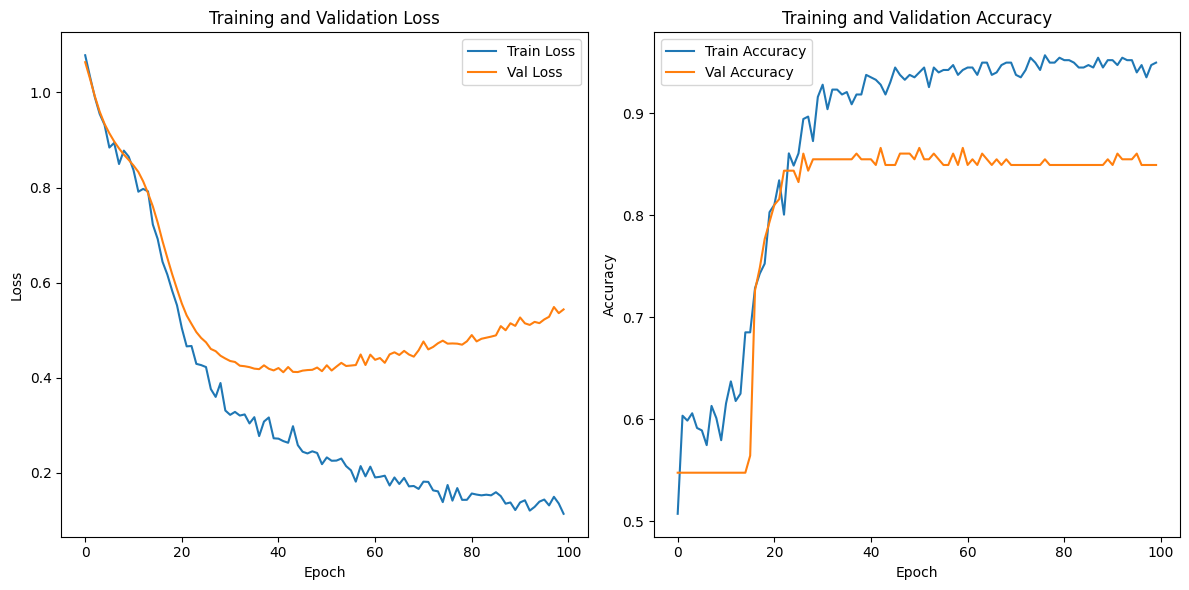

In [484]:
# Visualisasi compare train loss and val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualisasi compare train accuracy and val accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [485]:
from tensorflow.keras.layers import LSTM

# Model LSTM
model_lstm = Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.LSTM(32, dropout=0.5, recurrent_dropout=0.5),  # Menambahkan dropout pada lapisan LSTM
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [486]:
# Compile model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary model
model_lstm.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_37 (Embedding)    (None, 15, 16)            160000    
                                                                 
 lstm_15 (LSTM)              (None, 15, 64)            20736     
                                                                 
 dense_89 (Dense)            (None, 15, 32)            2080      
                                                                 
 lstm_16 (LSTM)              (None, 32)                8320      
                                                                 
 dense_90 (Dense)            (None, 18)                594       
                                                                 
 dropout_41 (Dropout)        (None, 18)                0         
                                                                 
 dense_91 (Dense)            (None, 3)               

In [487]:
# Training model
history_lstm = model_lstm.fit(training_padded, training_labels, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
15/15 [==============================] - 14s 158ms/step - loss: 1.0197 - accuracy: 0.5504 - val_loss: 0.9100 - val_accuracy: 0.5966
Epoch 2/50
15/15 [==============================] - 1s 57ms/step - loss: 0.9026 - accuracy: 0.5525 - val_loss: 0.8746 - val_accuracy: 0.5966
Epoch 3/50
15/15 [==============================] - 1s 62ms/step - loss: 0.8753 - accuracy: 0.5336 - val_loss: 0.8771 - val_accuracy: 0.5966
Epoch 4/50
15/15 [==============================] - 1s 55ms/step - loss: 0.8466 - accuracy: 0.5504 - val_loss: 0.8726 - val_accuracy: 0.5966
Epoch 5/50
15/15 [==============================] - 1s 63ms/step - loss: 0.8389 - accuracy: 0.5588 - val_loss: 0.8575 - val_accuracy: 0.5966
Epoch 6/50
15/15 [==============================] - 1s 56ms/step - loss: 0.8449 - accuracy: 0.5735 - val_loss: 0.8325 - val_accuracy: 0.5966
Epoch 7/50
15/15 [==============================] - 1s 80ms/step - loss: 0.7694 - accuracy: 0.5882 - val_loss: 0.6500 - val_accuracy: 0.6134
Epoch 8/50


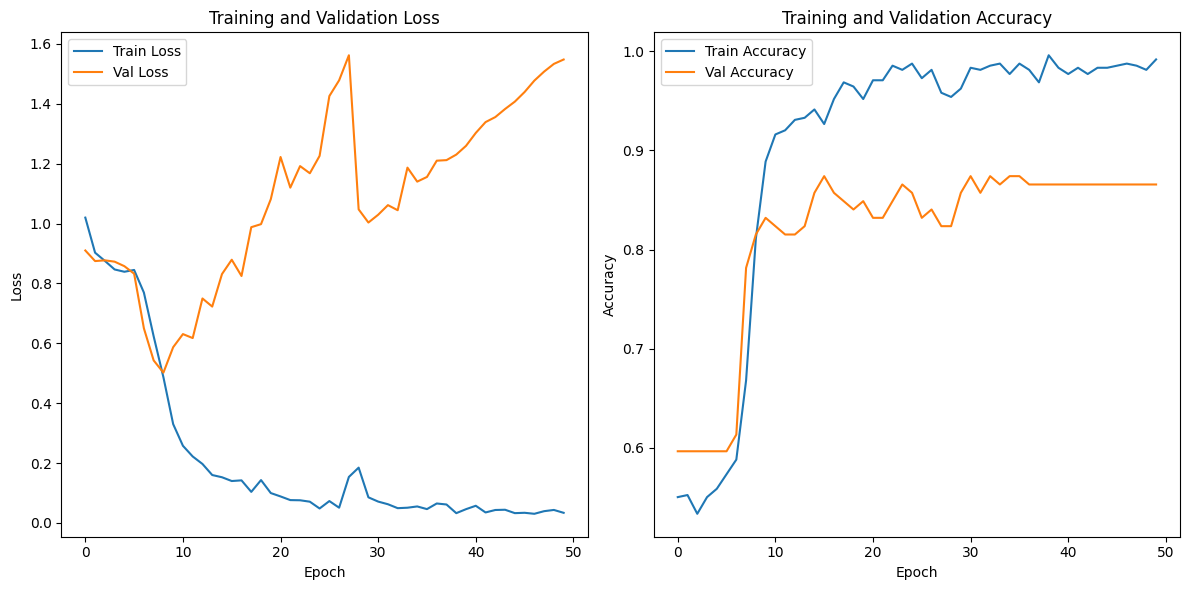

In [488]:
# Visualisasi compare train loss and val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualisasi compare train accuracy and val accuracy
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [489]:
from tensorflow.keras.layers import SimpleRNN

# Model RNN
model_rnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [490]:
# Compile model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary model
model_rnn.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_38 (Embedding)    (None, 15, 16)            160000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 15, 64)            5184      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense_92 (Dense)            (None, 32)                1056      
                                                                 
 dropout_42 (Dropout)        (None, 32)                0         
                                                                 
 dense_93 (Dense)            (None, 3)                 99        
                                                                 
Total params: 169443 (661.89 KB)
Trainable params: 16

In [491]:
# Training model
history_rnn = model_rnn.fit(training_padded, training_labels, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
15/15 [==============================] - 4s 54ms/step - loss: 0.9501 - accuracy: 0.5105 - val_loss: 0.8896 - val_accuracy: 0.6134
Epoch 2/30
15/15 [==============================] - 0s 28ms/step - loss: 0.8441 - accuracy: 0.5504 - val_loss: 0.7772 - val_accuracy: 0.6639
Epoch 3/30
15/15 [==============================] - 0s 31ms/step - loss: 0.5959 - accuracy: 0.7647 - val_loss: 0.6378 - val_accuracy: 0.7647
Epoch 4/30
15/15 [==============================] - 0s 30ms/step - loss: 0.4007 - accuracy: 0.8845 - val_loss: 0.6044 - val_accuracy: 0.7647
Epoch 5/30
15/15 [==============================] - 0s 33ms/step - loss: 0.2503 - accuracy: 0.9370 - val_loss: 0.5816 - val_accuracy: 0.7563
Epoch 6/30
15/15 [==============================] - 0s 33ms/step - loss: 0.1450 - accuracy: 0.9643 - val_loss: 0.6221 - val_accuracy: 0.8235
Epoch 7/30
15/15 [==============================] - 0s 28ms/step - loss: 0.0809 - accuracy: 0.9811 - val_loss: 0.6591 - val_accuracy: 0.8319
Epoch 8/30
15

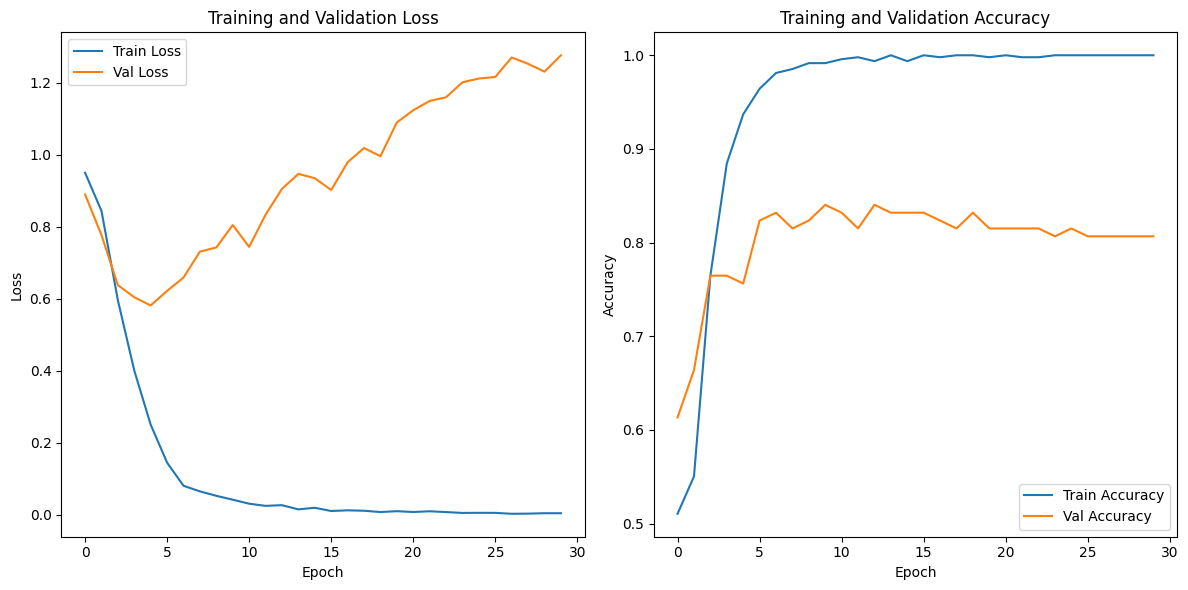

In [492]:
# Visualisasi compare train loss and val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualisasi compare train accuracy and val accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [493]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout

# Model CNN
model_cnn = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(3),
    Conv1D(32, 3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [494]:
# Compile model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary model
model_cnn.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_39 (Embedding)    (None, 15, 16)            160000    
                                                                 
 conv1d_6 (Conv1D)           (None, 13, 64)            3136      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 4, 64)             0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 32)             6176      
                                                                 
 global_max_pooling1d_6 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_94 (Dense)            (None, 64)              

In [495]:
# Training model
history_cnn = model_cnn.fit(training_padded, training_labels, epochs=20, batch_size=32, validation_split=0.3)

Epoch 1/20
13/13 [==============================] - 2s 29ms/step - loss: 1.0613 - accuracy: 0.5793 - val_loss: 1.0176 - val_accuracy: 0.5475
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.9414 - accuracy: 0.6010 - val_loss: 0.8992 - val_accuracy: 0.5475
Epoch 3/20
13/13 [==============================] - 0s 12ms/step - loss: 0.8503 - accuracy: 0.5938 - val_loss: 0.8569 - val_accuracy: 0.5475
Epoch 4/20
13/13 [==============================] - 0s 15ms/step - loss: 0.8001 - accuracy: 0.5913 - val_loss: 0.8176 - val_accuracy: 0.5475
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.7446 - accuracy: 0.6154 - val_loss: 0.7690 - val_accuracy: 0.5475
Epoch 6/20
13/13 [==============================] - 0s 12ms/step - loss: 0.6644 - accuracy: 0.6587 - val_loss: 0.6801 - val_accuracy: 0.5475
Epoch 7/20
13/13 [==============================] - 0s 12ms/step - loss: 0.5321 - accuracy: 0.7668 - val_loss: 0.5846 - val_accuracy: 0.7430
Epoch 8/20
13

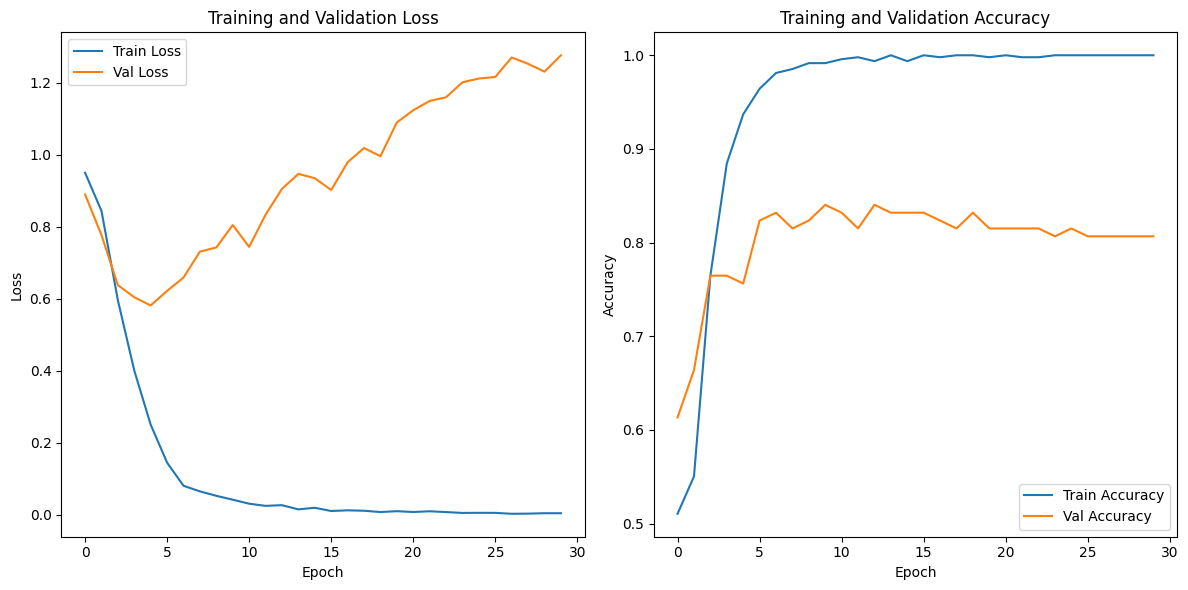

In [496]:
# Visualisasi compare train loss and val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualisasi compare train accuracy and val accuracy
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()